In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from time import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

from sklearn.externals import joblib

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import skew
import math
pd.options.display.max_columns = 999
sns.set(rc={'figure.figsize':(9,7)})
%matplotlib inline

In [90]:
student_combined= pd.read_csv('../data/processed/student_combined.csv')
assessment_combined =  pd.read_csv('../data/processed/assessment_combined.csv')
ddd_exams =pd.read_csv('../data/processed/ddd_exams.csv')

#Dropping Columns that are irrellevant
#-'id_assessment','id_student' are all key fields that wont be informative
#-'date','weight','tma_number','is_banked','date_unregistration' always contian the same value
ddd_exams=ddd_exams.drop(['id_assessment',
                          'is_banked',
                          'id_student',
                          'date','weight',
                          'tma_number',
                          'date_unregistration'],axis=1)

# Exploratory Data Analysis
* Data preprossed using the preprocess.py file
* Examinging how demographic, past grade performance, and studying habits have an impact on final exam score


In [91]:
ddd_exams.describe()

,date_submitted,score,num_of_prev_attempts,studied_credits,date_registration,tma1,tma2,tma3,tma4,tma5,tma6,tma_average,externalquiz,forumng,glossary,homepage,oucollaborate,oucontent,ouwiki,resource,subpage,url
count,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1982.000000,1983.000000,1982.000000,1982.000000,1979.000000,1983.000000,1883.000000,1963.000000,910.000000,1983.000000,1783.000000,1980.000000,1153.000000,1983.000000,1983.000000,1954.000000
mean,240.019667,66.288956,0.141704,78.837620,-77.813918,76.803328,80.316347,80.229955,74.692735,68.331988,63.889843,74.003782,16.251726,446.160978,40.849451,371.285426,23.321368,170.304545,111.209887,78.254160,254.316692,34.215455
std,3.488935,18.907089,0.430416,30.946193,48.517280,13.922107,12.678661,14.549806,19.371392,19.656253,22.098753,13.512523,18.233267,651.430788,158.246324,397.430508,25.605144,148.140063,88.907808,126.442694,240.874019,50.268293
min,234.000000,0.000000,0.000000,60.000000,-267.000000,12.000000,20.000000,18.000000,0.000000,0.000000,0.000000,23.833333,1.000000,1.000000,1.000000,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,237.000000,53.000000,0.000000,60.000000,-112.500000,68.000000,74.000000,72.000000,64.000000,55.000000,50.000000,64.833333,5.000000,120.000000,4.000000,169.500000,7.000000,73.000000,61.000000,40.000000,109.500000,11.250000
50%,242.000000,67.000000,0.000000,60.000000,-65.000000,80.000000,83.000000,83.000000,80.000000,72.000000,68.000000,76.166667,12.000000,262.000000,11.000000,280.000000,15.000000,128.000000,90.000000,63.000000,199.000000,25.000000
75%,243.000000,82.000000,0.000000,90.000000,-38.000000,88.000000,90.000000,92.000000,90.000000,84.000000,82.000000,85.000000,22.000000,510.500000,25.000000,440.500000,31.000000,227.000000,141.000000,97.000000,322.000000,43.000000
max,279.000000,100.000000,5.000000,270.000000,101.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.666667,340.000000,7847.000000,2952.000000,7277.000000,224.000000,2486.000000,1004.000000,5147.000000,4345.000000,966.000000


[]

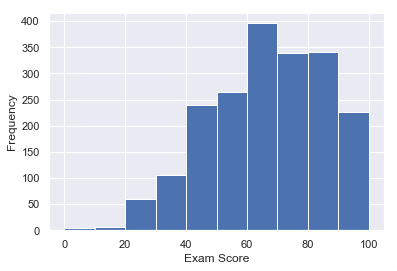

In [92]:
ax=ddd_exams.score.plot.hist(bins=10)
ax.set_xlabel('Exam Score')
plt.plot()

In [93]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_ddd_exams = ddd_exams.select_dtypes(include=numerics)

[]

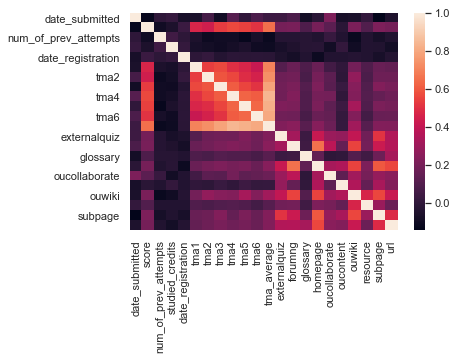

In [94]:

sns.heatmap(numeric_ddd_exams.corr())
plt.plot()

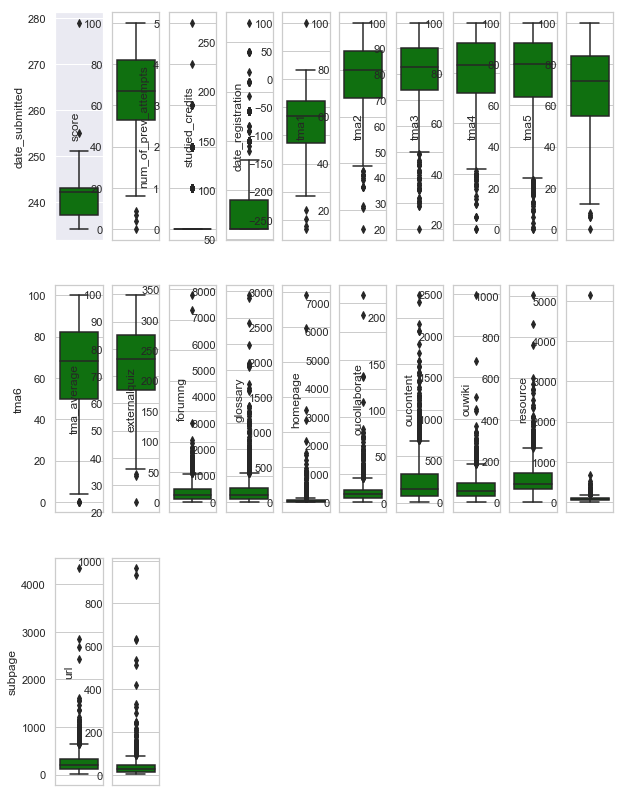

In [95]:
l = numeric_ddd_exams.columns.values
number_of_columns=10
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(ddd_exams[l[i]],color='green',orient='v')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Demographic Data Analysis

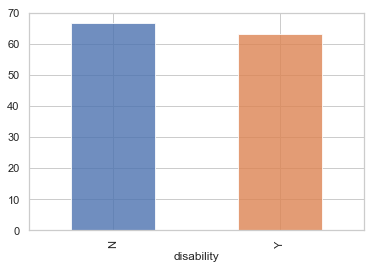

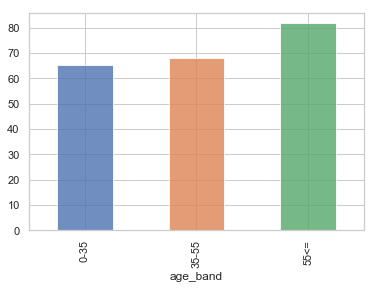

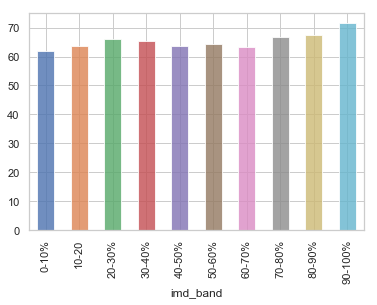

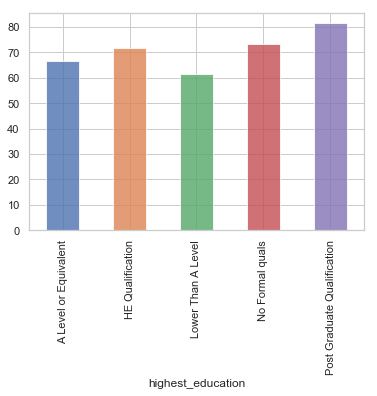

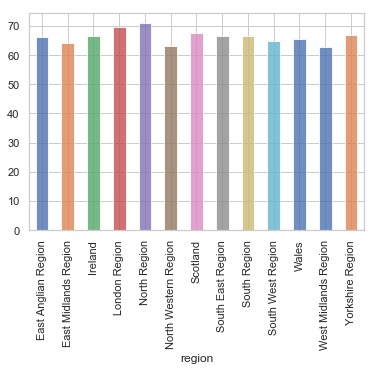

In [97]:
demo_cols = ['disability','age_band','imd_band','highest_education','region']
for i,col in enumerate(demo_cols):
    fig, ax = plt.subplots()
    ddd_exams.groupby(col).score.mean().plot.bar(alpha=.8,ax=ax)
    ax.set_xlabel(col)

Text(0, 0.5, 'Final Score')

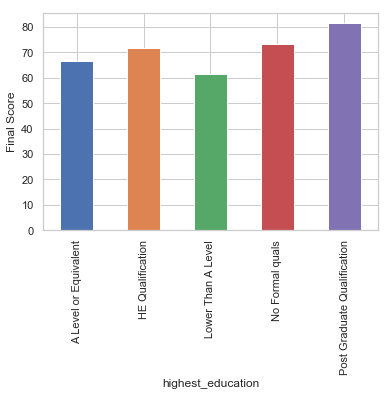

In [80]:
ax = ddd_exams.groupby('highest_education').score.mean().plot.bar()
ax.set_ylabel("Final Score")

Text(0, 0.5, 'Final Score')

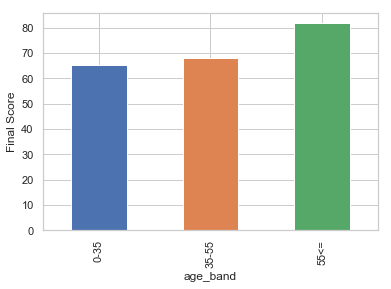

In [81]:
ax = ddd_exams.groupby('age_band').score.mean().plot.bar()
ax.set_ylabel("Final Score")

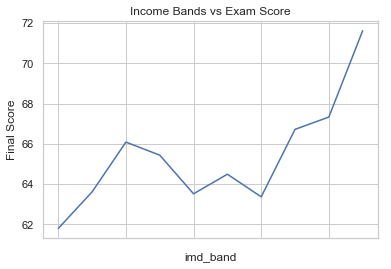

In [82]:
ax = ddd_exams.groupby('imd_band').score.mean().plot.line()
ax.set_ylabel("Final Score")
ax.set_title('Income Bands vs Exam Score')
plt.show()

### Quiz Grade Analysis

Text(0, 0.5, 'Final Score')

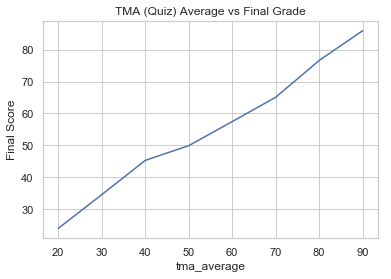

In [88]:
temp = ddd_exams.copy()
temp['tma_average']=np.floor(temp.tma_average/10)*10

ax = temp.groupby('tma_average').score.mean().plot.line()
ax.set_title('TMA (Quiz) Average vs Final Grade')
ax.set_ylabel("Final Score")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


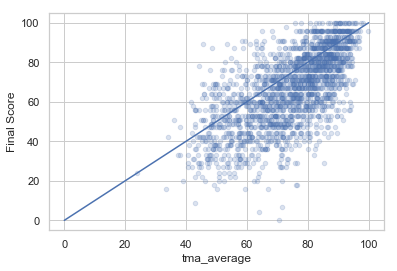

In [84]:
ax = ddd_exams.plot.scatter(x='tma_average',y='score',alpha=.2)
ax.set_ylabel("Final Score")
ax.plot([0,100],[0,100])

exam_score
A    AxesSubplot(0.125,0.125;0.775x0.755)
B    AxesSubplot(0.125,0.125;0.775x0.755)
C    AxesSubplot(0.125,0.125;0.775x0.755)
F    AxesSubplot(0.125,0.125;0.775x0.755)
Name: tma_average, dtype: object

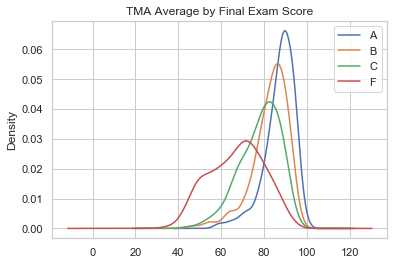

In [85]:
temp = ddd_exams.copy()
temp['exam_score']='A'
temp.loc[temp.score<90,'exam_score']='B'
temp.loc[temp.score<80,'exam_score']='C'
temp.loc[temp.score<70,'exam_score']='F'

temp.groupby('exam_score').tma_average.plot.density(legend=True,title='TMA Average by Final Exam Score')


### Studying Habits Analysis

Text(0, 0.5, 'Final Score')

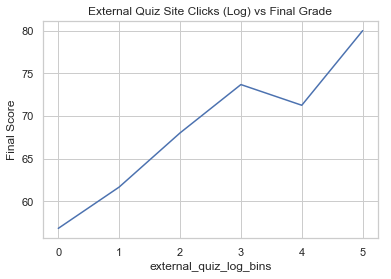

In [86]:
temp = ddd_exams.copy()
temp['external_quiz_log_bins']=np.floor(np.log(temp.externalquiz))

ax = temp.groupby('external_quiz_log_bins').score.mean().plot.line()
ax.set_title('External Quiz Site Clicks (Log) vs Final Grade')
ax.set_ylabel("Final Score")

Text(0.5, 1.0, 'Homepage Clicks (Log) vs Final Grade')

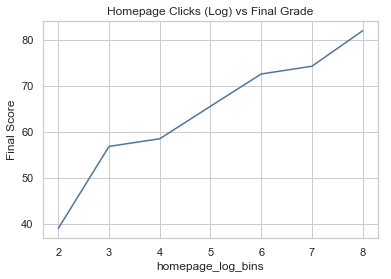

In [87]:
temp = ddd_exams.copy()
temp['homepage_log_bins']=np.floor(np.log(temp.homepage))

ax = temp.groupby('homepage_log_bins').score.mean().plot.line()
ax.set_ylabel("Final Score")
ax.set_title('Homepage Clicks (Log) vs Final Grade')

# Model Build
* Examining distribution of numeric columns
* Most of the demographic columns and quiz grades are fairly normally distributed
* Web site interaction features are skewed to the left


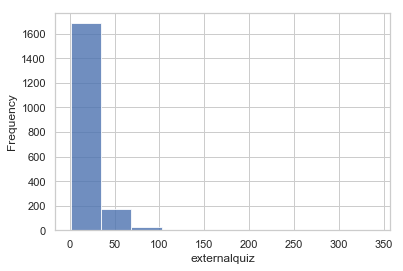

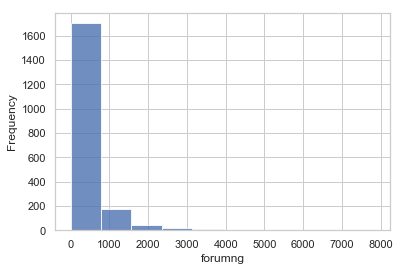

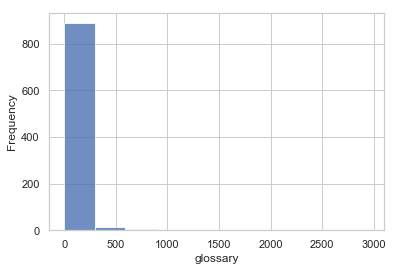

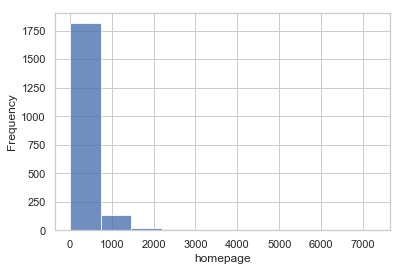

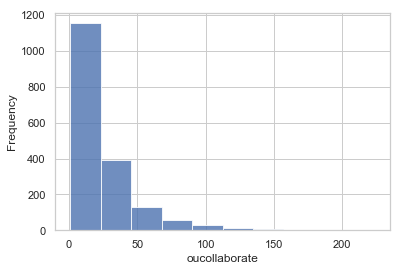

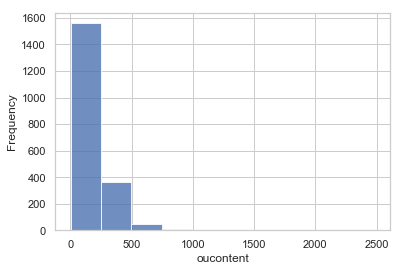

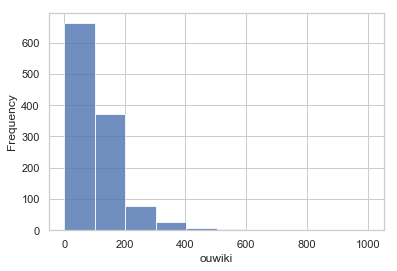

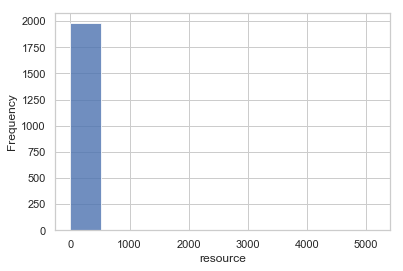

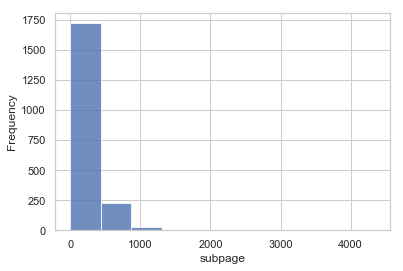

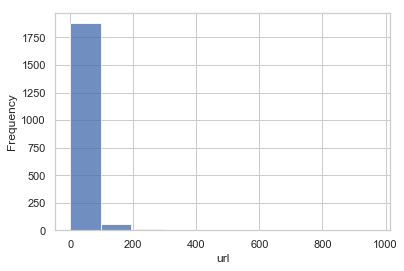

In [51]:
#Study Columns are very skewed
study_cols = ['externalquiz',
              'forumng',
              'glossary',
              'homepage',
              'oucollaborate',
              'oucontent',
              'ouwiki',
              'resource',
              'subpage',
              'url']


for i,col in enumerate(study_cols):
    fig, ax = plt.subplots()
    ddd_exams[col].plot.hist(alpha=.8,ax=ax)
    ax.set_xlabel(col)

date_submitted-0.28278634112804885
num_of_prev_attempts-3.8307670115132506
studied_credits-1.8299864232979697
date_registration--0.7006085776771173
tma1--0.7172073835669704
tma2--1.0761893506307192
tma3--1.0052679133565754
tma4--1.062571643843409
tma5--0.6927660833853199
tma6--0.6363433256046661
tma_average--0.5429132320320708


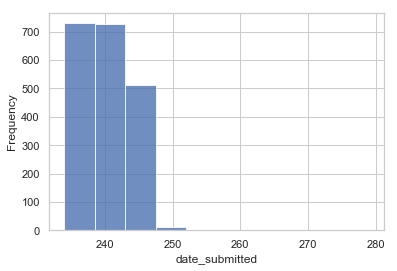

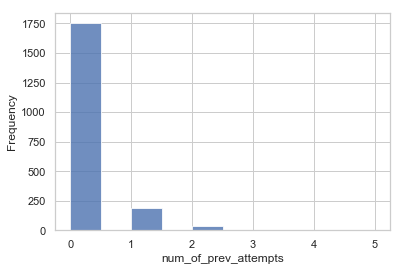

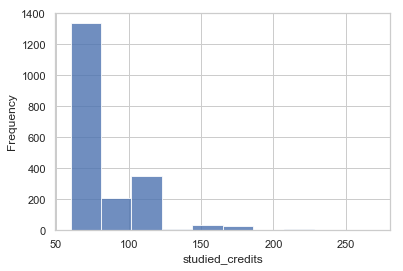

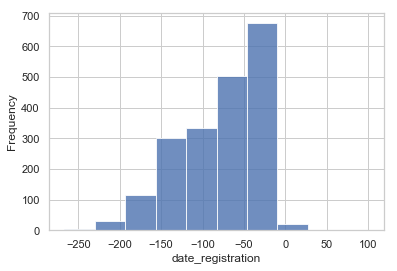

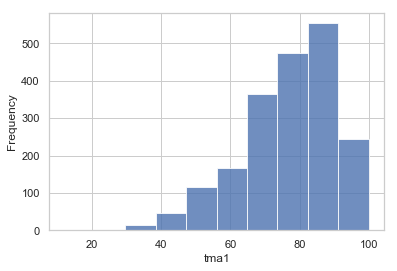

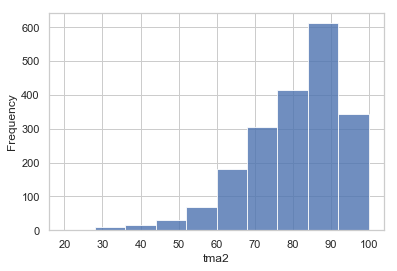

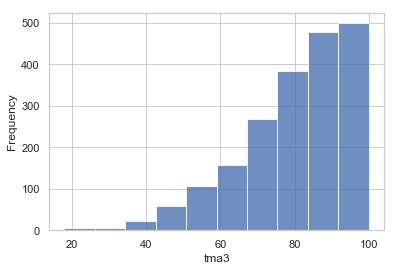

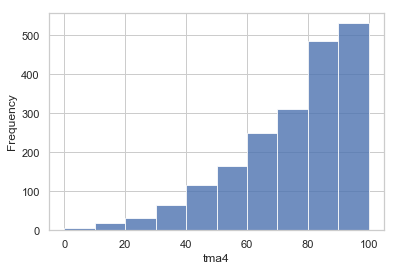

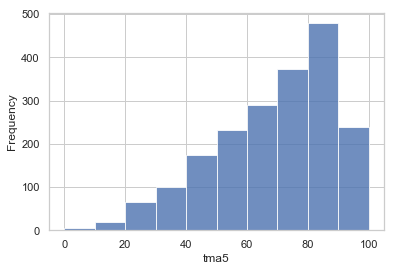

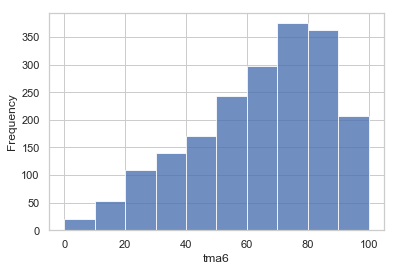

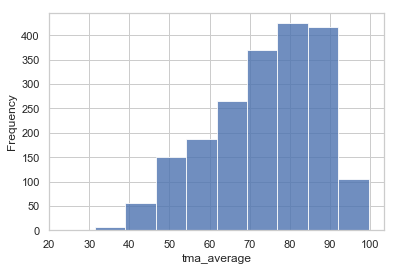

In [52]:
num_fields = ['date_submitted',
             'num_of_prev_attempts',
             'studied_credits',
             'date_registration',
             'tma1',
             'tma2',
             'tma3',
             'tma4',
             'tma5',
             'tma6',
             'tma_average']



for i,col in enumerate(num_fields):
    print(col+"-"+str(skew(ddd_exams[col].fillna(0))))
    fig, ax = plt.subplots()
    ddd_exams[col].plot.hist(alpha=.8,ax=ax)
    ax.set_xlabel(col)

In [53]:
#Keeping the performance fields as is
num_fields = ['date_submitted',
             'num_of_prev_attempts',
             'studied_credits',
             'date_registration',
             'tma1',
             'tma2',
             'tma3',
             'tma4',
             'tma5',
             'tma6',
             'tma_average']


#Onehot encoding some of the demographic information
dummy_cols = ['disability','age_band','imd_band','highest_education','region','gender']
dummy_cols_one_hot=[]
for col in dummy_cols:
    dummies = pd.get_dummies(ddd_exams[col])
    ddd_exams[dummies.columns]=dummies
    dummy_cols_one_hot+=list(dummies.columns)
    
#Taking a log transform of the study columns to normalize the data
study_cols = ['externalquiz',
              'forumng',
              'glossary',
              'homepage',
              'oucollaborate',
              'oucontent',
              'ouwiki',
              'resource',
              'subpage',
              'url']

for col in study_cols:
    ddd_exams[col]=np.log(ddd_exams[col])
    
ddd_exams=ddd_exams.fillna(0)
x_feats = study_cols+dummy_cols_one_hot+num_fields

In [54]:
X_train, X_test, y_train, y_test = train_test_split(ddd_exams[x_feats],ddd_exams.score, test_size=0.3,random_state = 42)

# Fitting a Lasso Model for Feature Selection/Baseline

In [55]:
alpha=[]
train_mse = []
val_mse = []
for i in range(1,21):
    alpha.append(i/20.0)
    regr = linear_model.Lasso(alpha=i/20.0,max_iter=10000)
    regr.fit(X_train,y_train)
    pred_train = regr.predict(X_train)
    pred_test = regr.predict(X_test)
    train_mse.append(mean_squared_error(y_train,pred_train))
    val_mse.append(mean_squared_error(y_test,pred_test))
   


Text(0, 0.5, 'MSE')

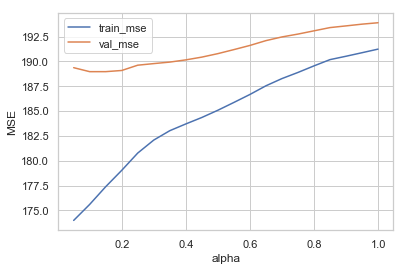

In [56]:
lasso_df = pd.DataFrame([alpha,train_mse,val_mse]).transpose()
lasso_df.columns=['alpha','train_mse','val_mse']
ax = lasso_df.plot.line(x='alpha',y=['train_mse','val_mse'])
ax.set_ylabel('MSE')

In [57]:

regr = linear_model.Lasso(alpha=0.2,max_iter=10000)
regr.fit(X_train,y_train)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

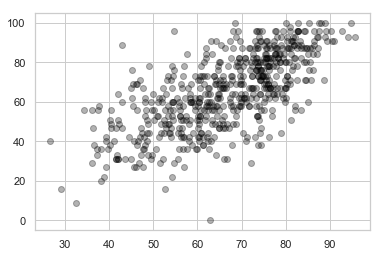

R2 -0.4682469066554923
MSE-189.0875458066322


In [58]:
pred = regr.predict(X_test)
plt.scatter(pred, y_test,  color='black',alpha=.3)

plt.show()
print("R2 -%s" % r2_score(y_test,pred))
print("MSE-%s" % mean_squared_error(y_test,pred))

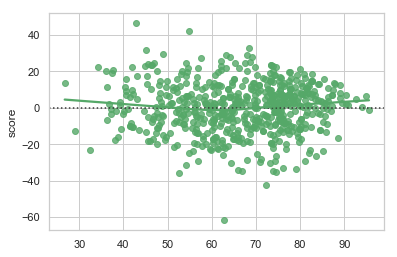

In [59]:

sns.residplot(pred,y_test, lowess=True, color="g")

In [60]:
coefs = pd.DataFrame(regr.coef_.reshape(1,len(regr.coef_)),columns=X_train.columns).transpose().reset_index()

In [61]:
coefs[coefs[0]!=0]

,index,0
0,externalquiz,1.321114e+00
4,oucollaborate,8.137664e-01
5,oucontent,-1.829545e+00
6,ouwiki,9.694495e-02
8,subpage,7.989610e-01
13,35-55,-9.753399e-01
21,60-70%,-1.411322e+00
24,90-100%,9.329445e-01
26,HE Qualification,6.346767e-01
27,Lower Than A Level,-2.302584e+00


In [62]:
#Select Just Relevant columns (coeficients not dropped to 0)
relevant_cols = list(coefs[coefs[0]!=0]['index'])

# Comparing to Gradient Boosting Regressor
* Doing a randomized search for hyperparameter tuning
* R-Squared on validation set is .54 compared to .42 with the linear regression model

In [63]:
X_train, X_test, y_train, y_test = train_test_split(ddd_exams[relevant_cols],ddd_exams.score, test_size=0.3,random_state = 42)

In [64]:
regr = GradientBoostingRegressor()

In [65]:
param_dist = {"max_depth": [2,3,4],
              "n_estimators":sp_randint(10,200),
              "subsample":[.7,.8,.9,1],
              "learning_rate":[0.01,0.05,.1,.15,.2],
              "criterion": ["friedman_mse", "mse","mae"]}

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(regr, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3,random_state=42)


random_search.fit(X_test, y_test)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'max_depth': [2, 3, 4], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1fadc400>, 'subsample': [0.7, 0.8, 0.9, 1], 'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2], 'criterion': ['friedman_mse', 'mse', 'mae']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

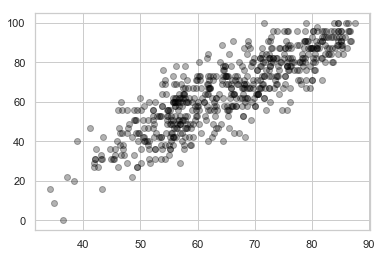

R2 -0.6779592591411816
MSE-114.51535327372731


In [66]:
pred = random_search.best_estimator_.predict(X_test)
plt.scatter(pred, y_test,  color='black',alpha=.3)

plt.show()
print("R2 -%s" % r2_score(y_test,pred))
print("MSE-%s" % mean_squared_error(y_test,pred))

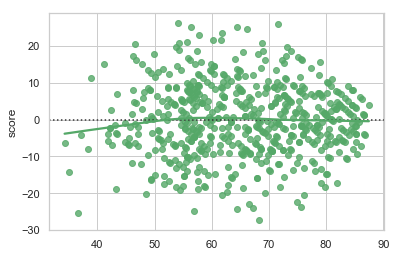

In [67]:

sns.residplot(pred,y_test, lowess=True, color="g")

In [68]:
joblib.dump(random_search.best_estimator_,'../models/best_gbr.pkl')

['../models/best_gbr.pkl']